# Short Time Fourier Transform

In [41]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

In [42]:
# Number of sample points
N_points = 1000

print(f'Maximum possible frequency resolution = {1/N_points}')

k = np.linspace(0, N_points-1, N_points)
k.shape

Maximum possible frequency resolution = 0.001


(1000,)

## Multi-Tone Stationary Signal

Here $k$ refers to sample number $k = \frac{t}{T_{sample}} = t F_{sample} $

$ x(t) = cos(2 \pi F t) $

$ x(k T_{sample}) = cos(2 \pi F k T_{sample}) $

$ x(k T_{sample}) = cos(2 \pi \frac{F}{F_{sample}} k) $

$ x(k T_{sample}) = cos(2 \pi f k) $

Normalized Frequencies will be in the range 0 - 0.5.

Frequencies above 0.5 will be aliased.

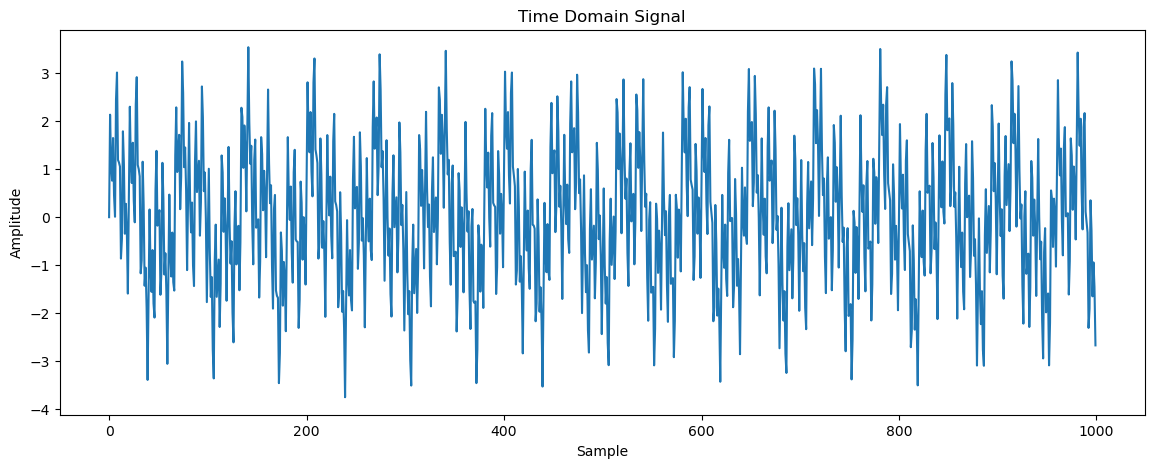

f1 = 0.015625
f2 = 0.045
f3 = 0.15
f4 = 0.3


In [43]:
# Normalized frequencies

f1 = 0.015625
f2 = 0.045
f3 = 0.15
f4 = 0.3

x_k = np.sin(2*np.pi*f1*k)+np.sin(2*np.pi*f2*k)+np.sin(2*np.pi*f3*k)+np.sin(2*np.pi*f4*k)

plt.figure(figsize=(14,5))
plt.plot(k, x_k)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal")
plt.show()

print(f'f1 = {f1}')
print(f'f2 = {f2}')
print(f'f3 = {f3}')
print(f'f4 = {f4}')

### Window Function

In [44]:
WINDOW_LENGTH = 128

print(f'Maximum Frequency Resolution = {1/WINDOW_LENGTH}')

Maximum Frequency Resolution = 0.0078125


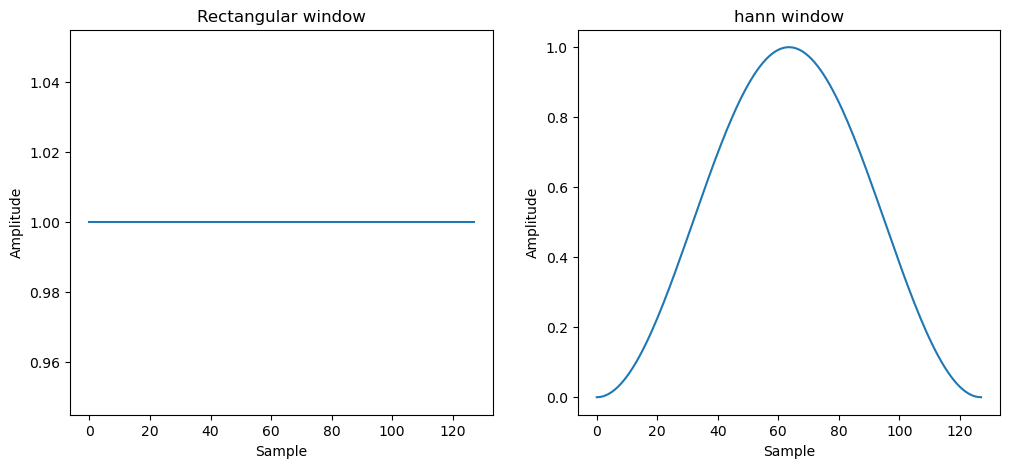

In [77]:
window_1 = signal.windows.boxcar(WINDOW_LENGTH)
window_2 = signal.windows.hann(WINDOW_LENGTH, 2*np.sqrt(WINDOW_LENGTH))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(window_1)
plt.title("Rectangular window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(1,2,2)
plt.plot(window_2)
plt.title("hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Windowed Signal

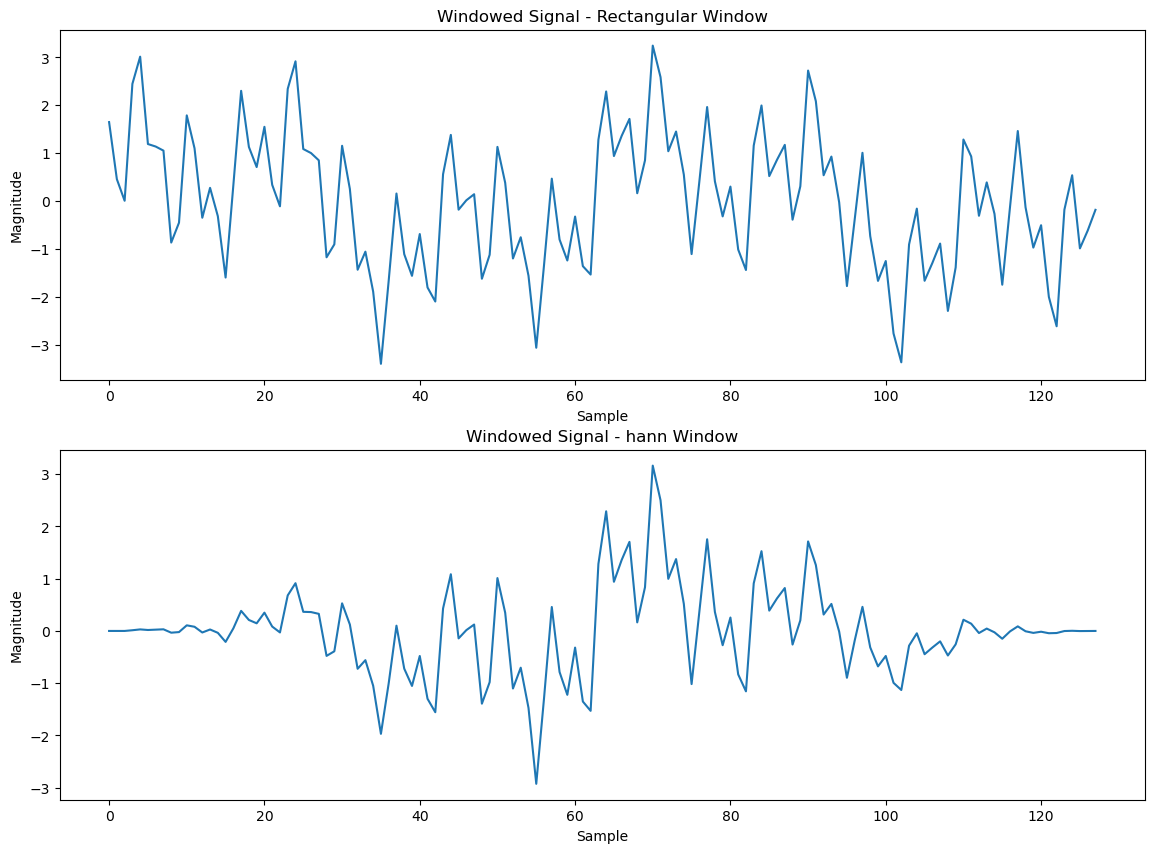

In [78]:
SHIFT = 4

x_windowed_1 = x_k[SHIFT:SHIFT+WINDOW_LENGTH]*window_1
x_windowed_2 = x_k[SHIFT:SHIFT+WINDOW_LENGTH]*window_2

plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
plt.plot(k[0:WINDOW_LENGTH], x_windowed_1)
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.title("Windowed Signal - Rectangular Window")

plt.subplot(2,1,2)
plt.plot(k[0:WINDOW_LENGTH], x_windowed_2)
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.title("Windowed Signal - hann Window")

plt.show()

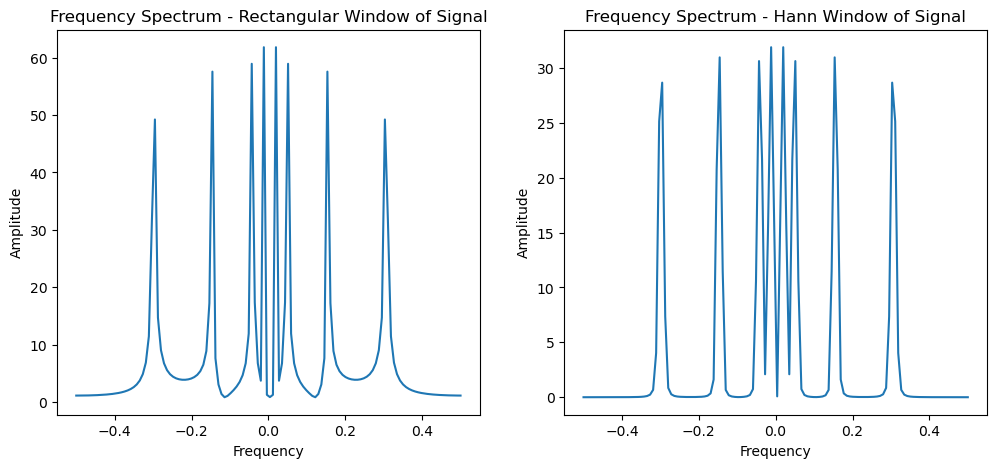

In [79]:
x_f_1 = fftshift(fft(x_windowed_1))
x_f_2 = fftshift(fft(x_windowed_2))
f = np.linspace(-0.5,0.5,len(x_f_1))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(f, np.abs(x_f_1))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum - Rectangular Window of Signal")

plt.subplot(1,2,2)
plt.plot(f, np.abs(x_f_2))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum - Hann Window of Signal")

plt.show()

### STFT

In [80]:
f,t,Zxx_1 = signal.stft(x_k,
                      fs=1.0, 
                      window=window_1,
                      nperseg=len(window_1),
                      noverlap=len(window_1)-1, 
                      boundary=None, 
                      padded=False,  
                      scaling='spectrum')

f,t,Zxx_2 = signal.stft(x_k,
                      fs=1.0, 
                      window=window_2,
                      nperseg=len(window_2),
                      noverlap=len(window_2)-1, 
                      boundary=None, 
                      padded=False,  
                      scaling='spectrum')

print(f'Shape of x_k = {x_k.shape}')
print(f'Shape of f = {f.shape}')
print(f'Shape of t = {t.shape}')
print(f'Shape of Zxx = {Zxx_1.shape}')

Shape of x_k = (1000,)
Shape of f = (65,)
Shape of t = (873,)
Shape of Zxx = (65, 873)


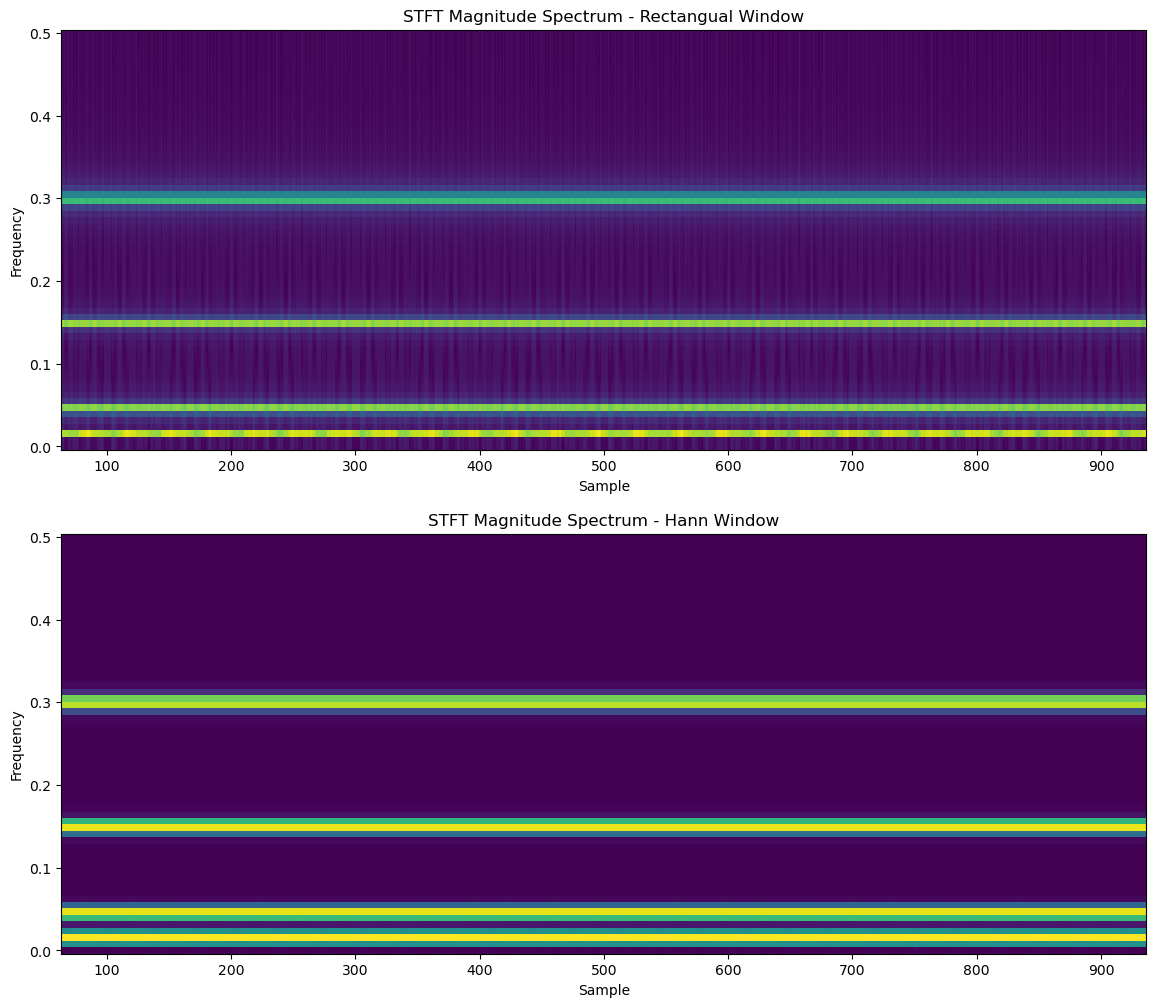

In [81]:
plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
plt.pcolormesh(t, f, np.abs(Zxx_1))
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("STFT Magnitude Spectrum - Rectangual Window")

plt.subplot(2,1,2)
plt.pcolormesh(t, f, np.abs(Zxx_2))
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("STFT Magnitude Spectrum - Hann Window")

plt.show()

### Spectrogram

Equivalent to square of the magnitude of the STFT

In [82]:
f,t,Sxx_1 = signal.spectrogram(x_k,
                             window=window_1,
                             nperseg=len(window_1), 
                             noverlap=len(window_1)-1, 
                             scaling='spectrum',  
                             mode='psd')

f,t,Sxx_2 = signal.spectrogram(x_k,
                             window=window_2,
                             nperseg=len(window_2), 
                             noverlap=len(window_2)-1, 
                             scaling='spectrum',  
                             mode='psd')


print(f'Shape of x_k = {x_k.shape}')
print(f'Shape of f = {f.shape}')
print(f'Shape of t = {t.shape}')
print(f'Shape of Zxx = {Sxx_1.shape}')

Shape of x_k = (1000,)
Shape of f = (65,)
Shape of t = (873,)
Shape of Zxx = (65, 873)


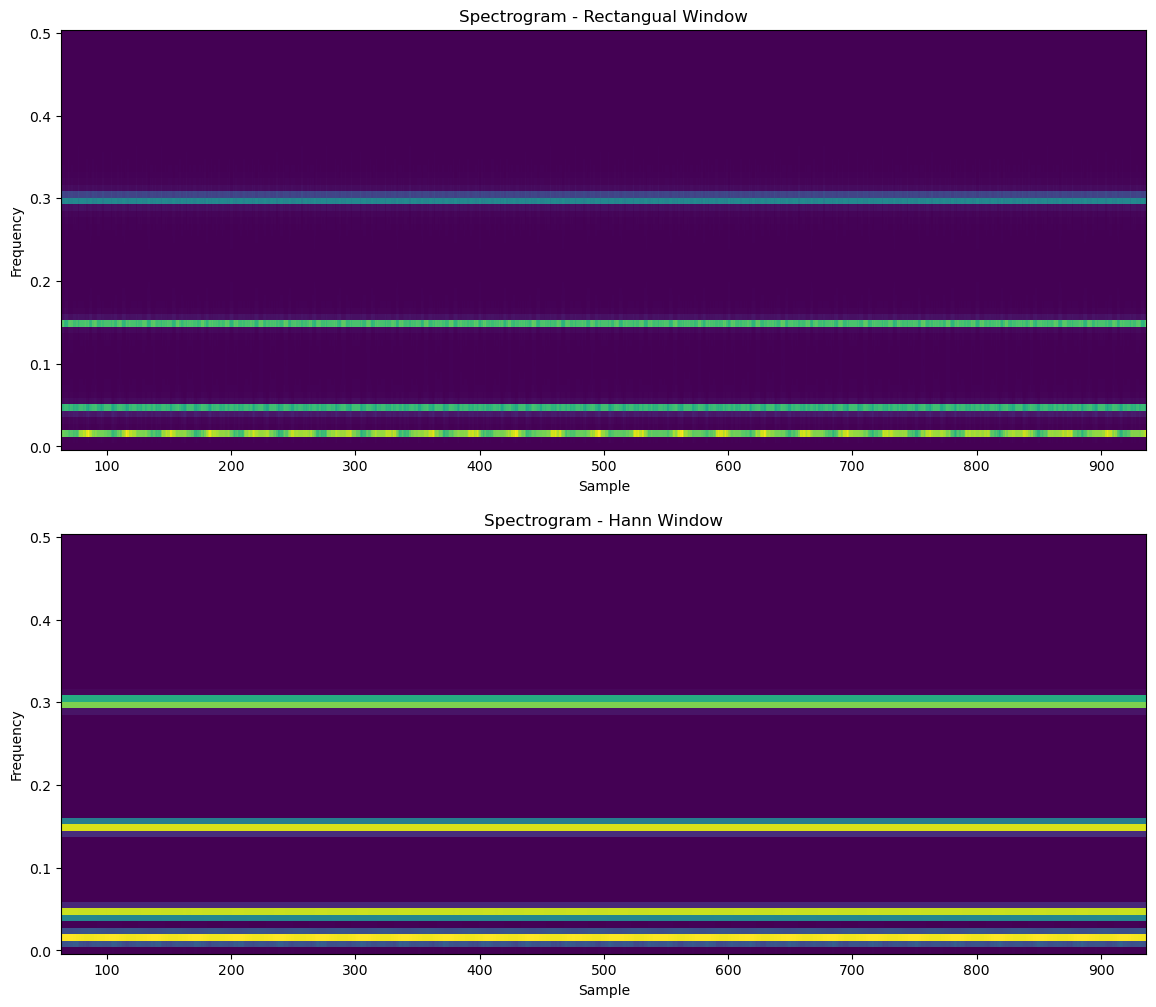

In [83]:
plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
plt.pcolormesh(t, f, Sxx_1)
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("Spectrogram - Rectangual Window")

plt.subplot(2,1,2)
plt.pcolormesh(t, f, Sxx_2)
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("Spectrogram - Hann Window")

plt.show()

## Nonstationary Signal

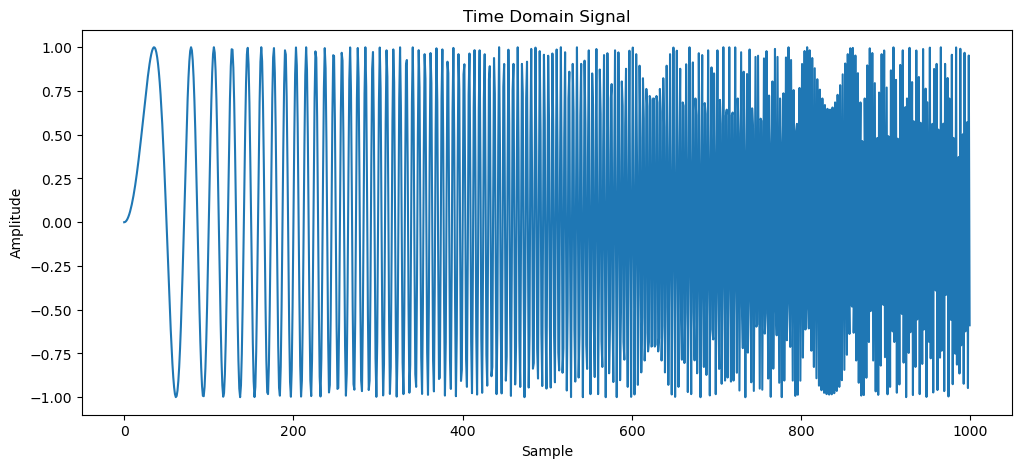

In [92]:
SCALE = 5000

i_freq = k/SCALE

x_k_2 = np.sin(2*np.pi*k*i_freq)

plt.figure(figsize=(12,5))
plt.plot(k, x_k_2)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal")
plt.show()


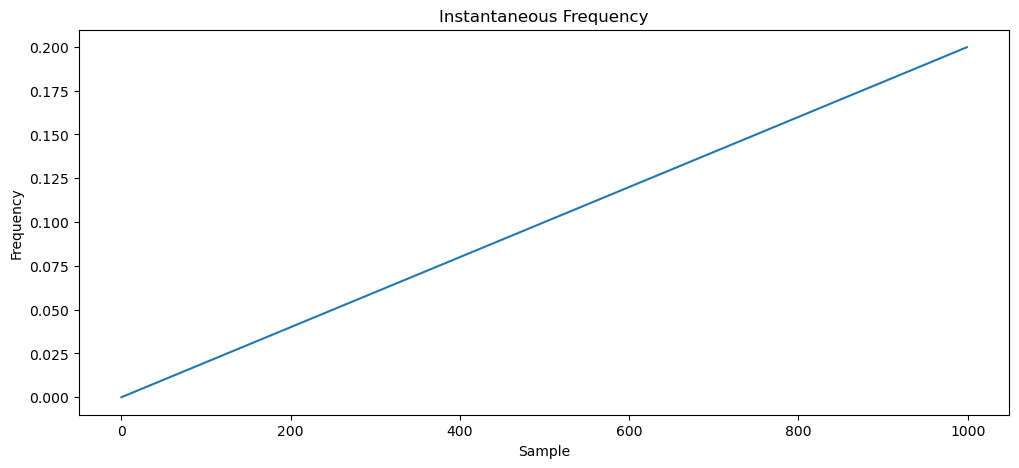

In [93]:
plt.figure(figsize=(12,5))
plt.plot(i_freq)
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("Instantaneous Frequency")
plt.show()

### Windowed Signal

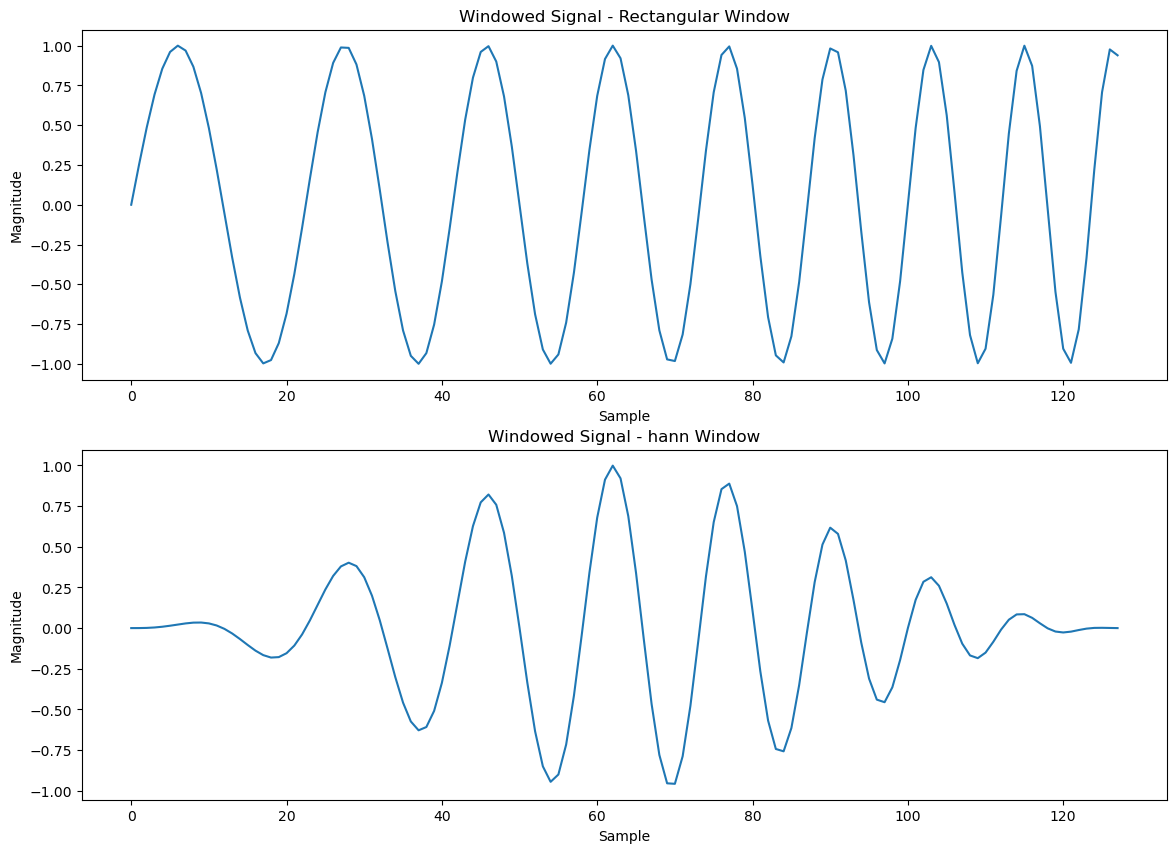

In [94]:
SHIFT = 100

x_windowed_1 = x_k_2[SHIFT:SHIFT+WINDOW_LENGTH]*window_1
x_windowed_2 = x_k_2[SHIFT:SHIFT+WINDOW_LENGTH]*window_2

plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
plt.plot(k[0:WINDOW_LENGTH], x_windowed_1)
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.title("Windowed Signal - Rectangular Window")

plt.subplot(2,1,2)
plt.plot(k[0:WINDOW_LENGTH], x_windowed_2)
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.title("Windowed Signal - hann Window")

plt.show()

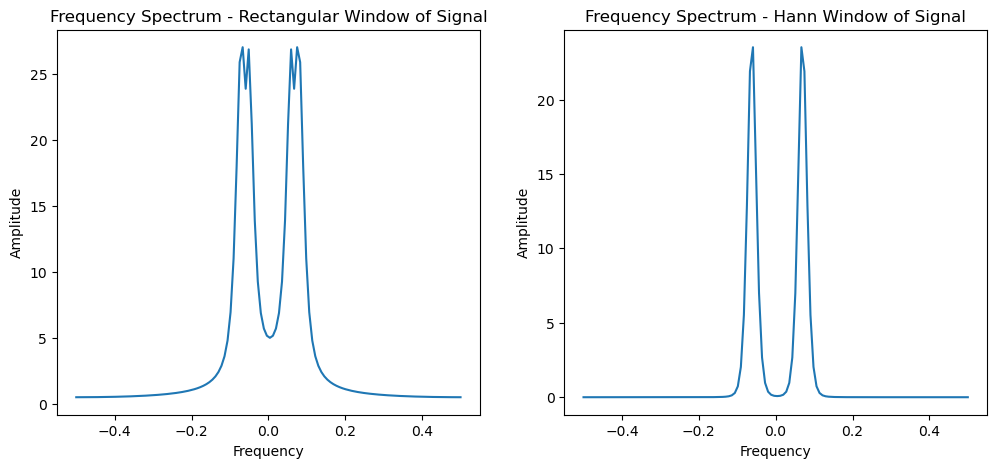

In [95]:
x_f_1 = fftshift(fft(x_windowed_1))
x_f_2 = fftshift(fft(x_windowed_2))
f = np.linspace(-0.5,0.5,len(x_f_1))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(f, np.abs(x_f_1))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum - Rectangular Window of Signal")

plt.subplot(1,2,2)
plt.plot(f, np.abs(x_f_2))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum - Hann Window of Signal")

plt.show()

### STFT

In [96]:
f,t,Zxx_1 = signal.stft(x_k_2,
                      fs=1.0, 
                      window=window_1,
                      nperseg=len(window_1),
                      noverlap=len(window_1)-1, 
                      boundary=None, 
                      padded=False,  
                      scaling='spectrum')

f,t,Zxx_2 = signal.stft(x_k_2,
                      fs=1.0, 
                      window=window_2,
                      nperseg=len(window_2),
                      noverlap=len(window_2)-1, 
                      boundary=None, 
                      padded=False,  
                      scaling='spectrum')

print(f'Shape of x_k = {x_k_2.shape}')
print(f'Shape of f = {f.shape}')
print(f'Shape of t = {t.shape}')
print(f'Shape of Zxx = {Zxx_1.shape}')

Shape of x_k = (1000,)
Shape of f = (65,)
Shape of t = (873,)
Shape of Zxx = (65, 873)


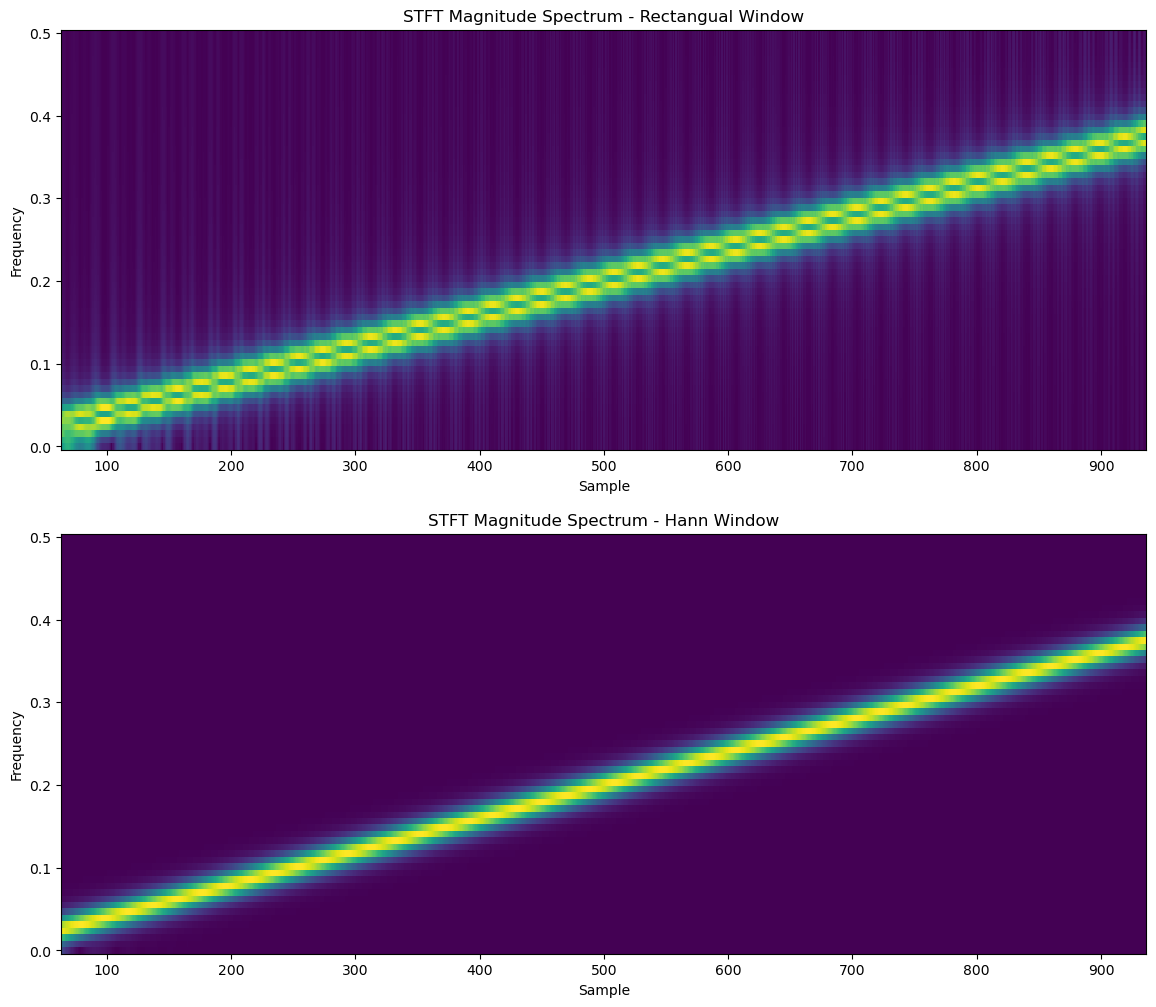

In [97]:
plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
plt.pcolormesh(t, f, np.abs(Zxx_1))
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("STFT Magnitude Spectrum - Rectangual Window")

plt.subplot(2,1,2)
plt.pcolormesh(t, f, np.abs(Zxx_2))
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("STFT Magnitude Spectrum - Hann Window")

plt.show()

### Spectrogram

Equivalent to square of the magnitude of the STFT

In [98]:
f,t,Sxx_1 = signal.spectrogram(x_k_2,
                             window=window_1,
                             nperseg=len(window_1), 
                             noverlap=len(window_1)-1, 
                             scaling='spectrum',  
                             mode='psd')

f,t,Sxx_2 = signal.spectrogram(x_k_2,
                             window=window_2,
                             nperseg=len(window_2), 
                             noverlap=len(window_2)-1, 
                             scaling='spectrum',  
                             mode='psd')


print(f'Shape of x_k = {x_k_2.shape}')
print(f'Shape of f = {f.shape}')
print(f'Shape of t = {t.shape}')
print(f'Shape of Zxx = {Sxx_1.shape}')

Shape of x_k = (1000,)
Shape of f = (65,)
Shape of t = (873,)
Shape of Zxx = (65, 873)


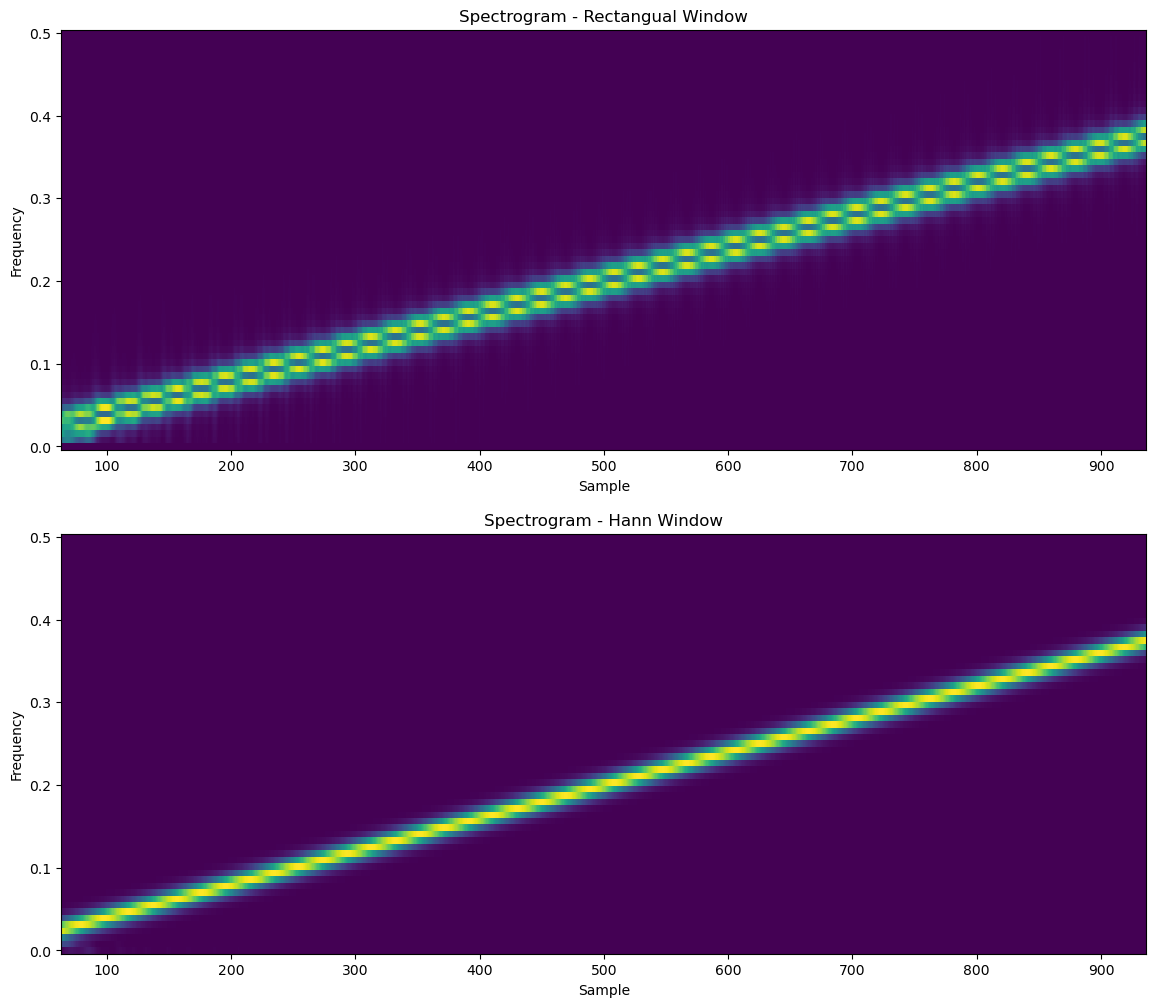

In [99]:
plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
plt.pcolormesh(t, f, Sxx_1)
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("Spectrogram - Rectangual Window")

plt.subplot(2,1,2)
plt.pcolormesh(t, f, Sxx_2)
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("Spectrogram - Hann Window")

plt.show()

Narrow window ===>good time resolution, poor frequency resolution.

Wide window ===>good frequency resolution, poor time resolution.